<a href="https://colab.research.google.com/github/easthometown/assignment/blob/main/SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicle Population Data
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
print(df.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [ ]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Fill numeric columns with the mean
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with the mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


Duplicate rows: 0


In [ ]:
# Print summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  177866.000000  177866.000000   177866.000000  177866.000000   
mean    98172.453506    2020.515512       58.842162    1073.109363   
std      2442.416338       2.989384       91.981298    8358.624956   
min      1545.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98122.000000    2022.000000        0.000000       0.000000   
75%     98370.000000    2023.000000       75.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         177866.000000    1.778660e+05       1.778660e+05  
mean              29.127481    2.202313e+08       5.297672e+10  
std               14.875875    7.584987e+07       1.578025e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.000

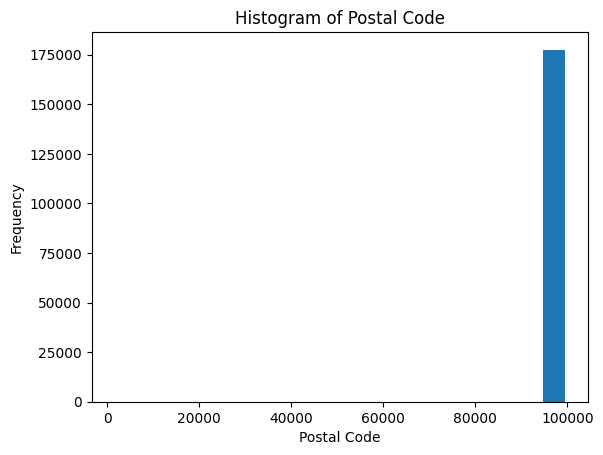

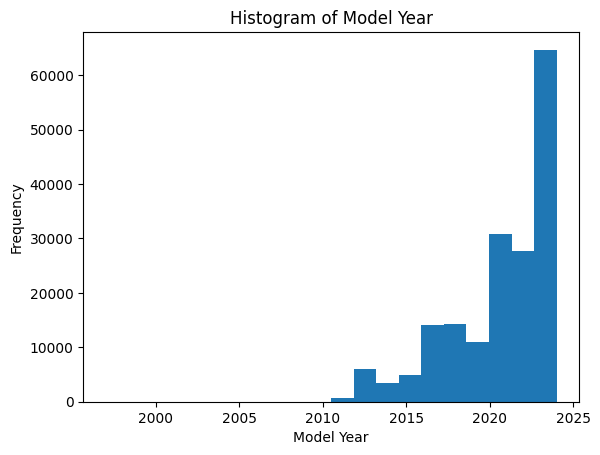

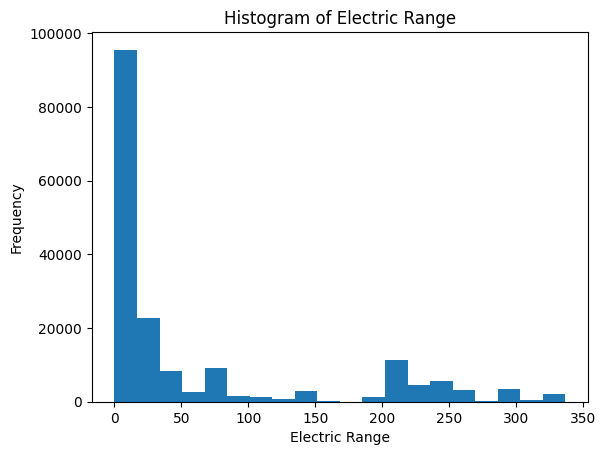

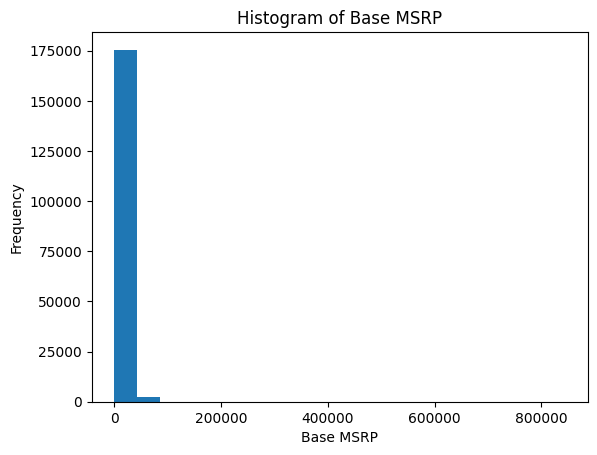

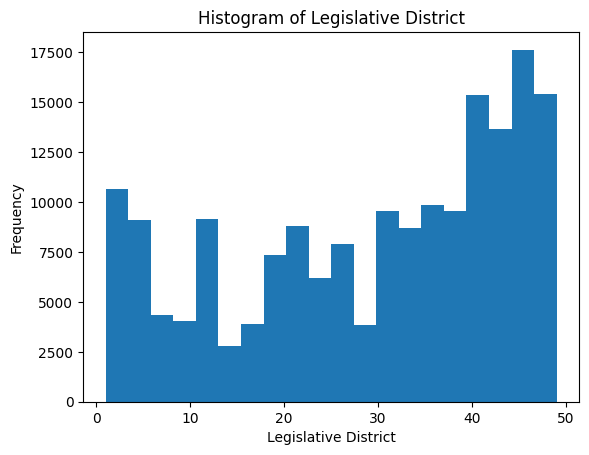

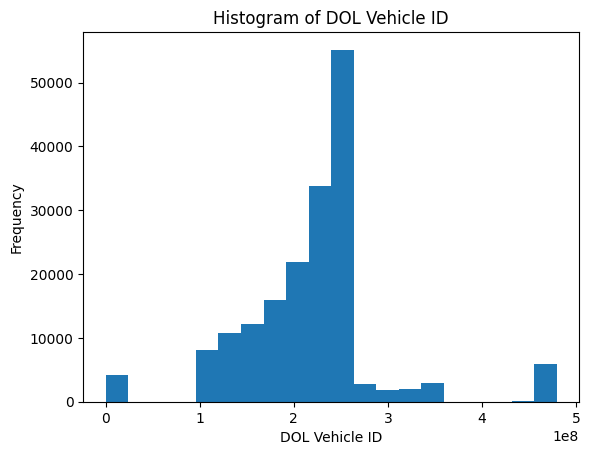

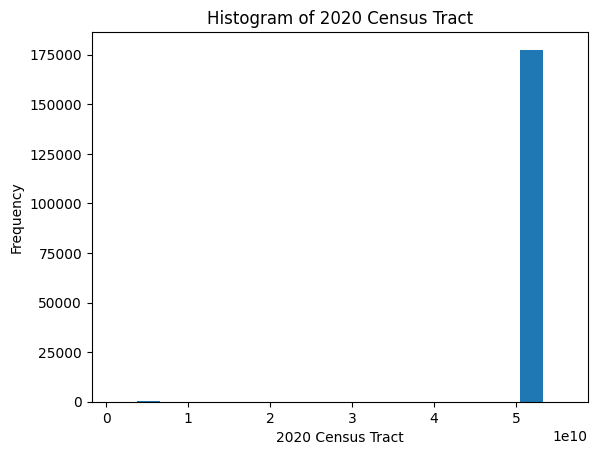

In [ ]:
# Plot histograms for all numerical columns
for col in df.select_dtypes(include=['number']).columns:
    plt.hist(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

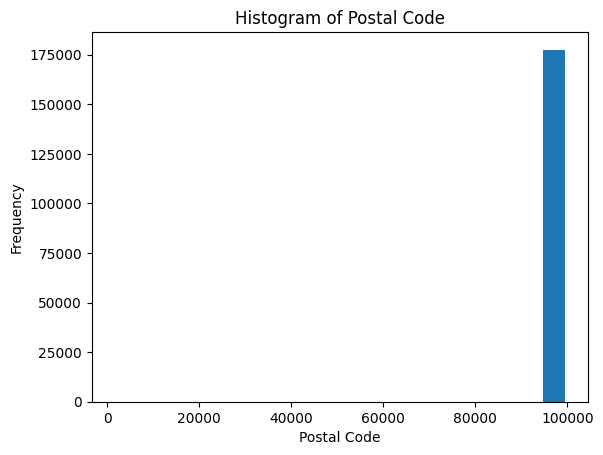

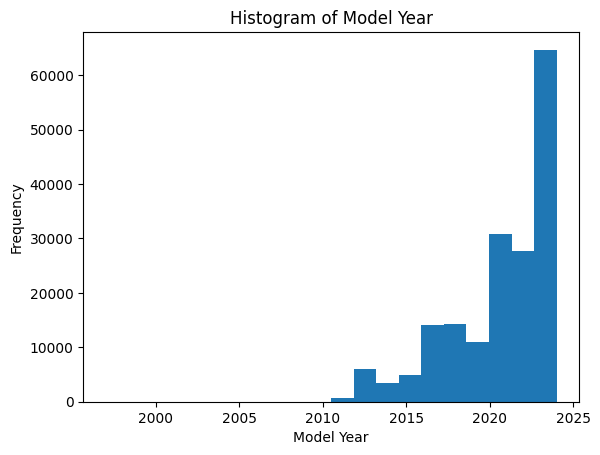

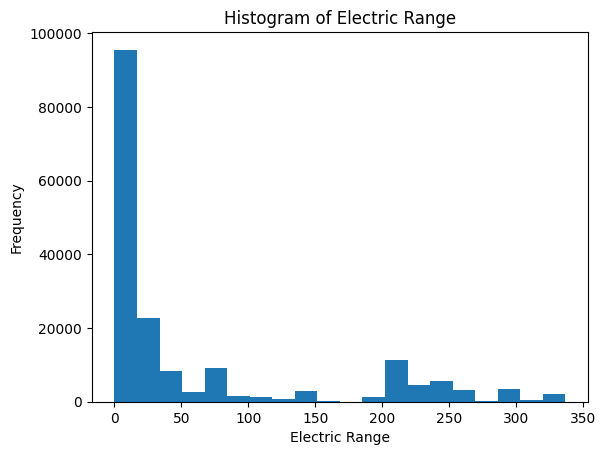

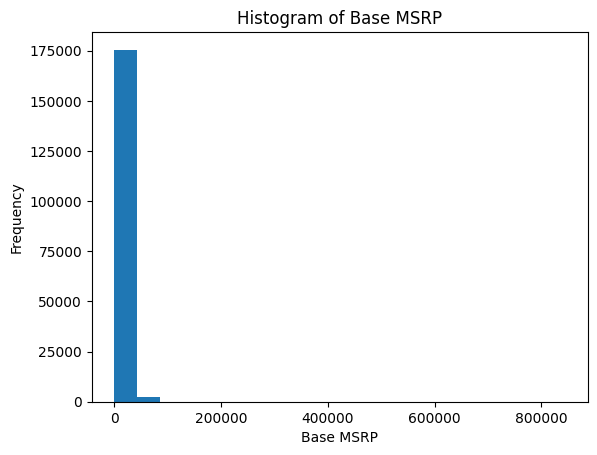

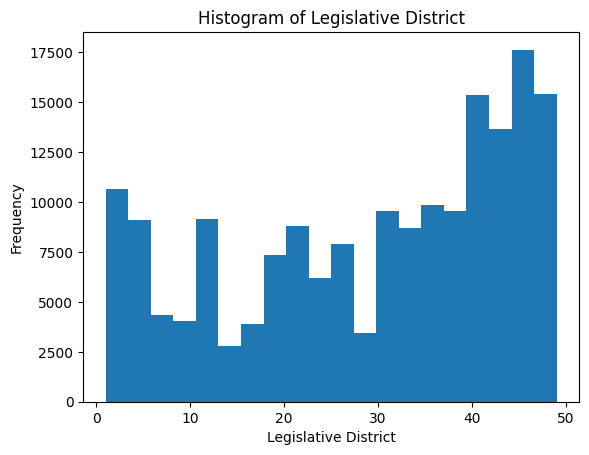

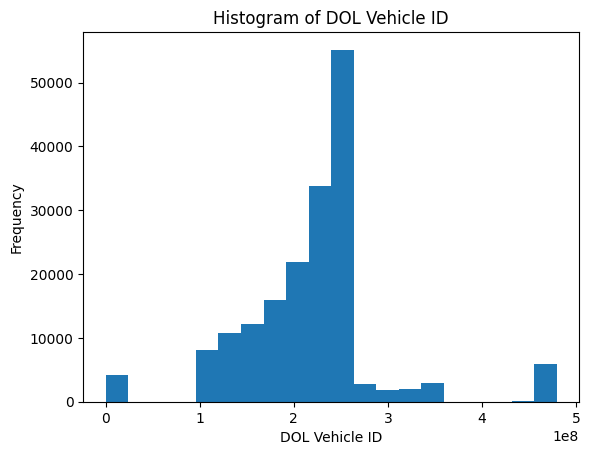

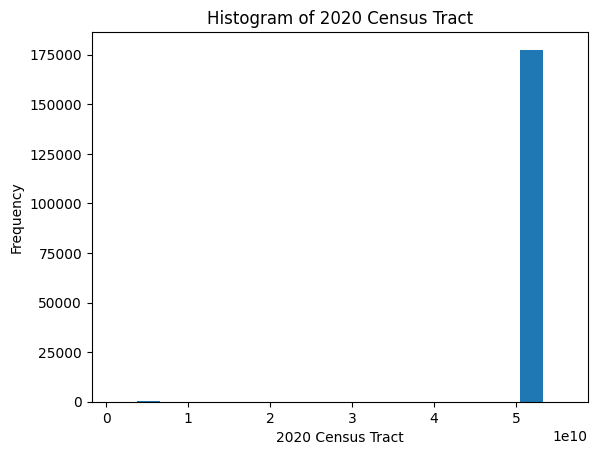

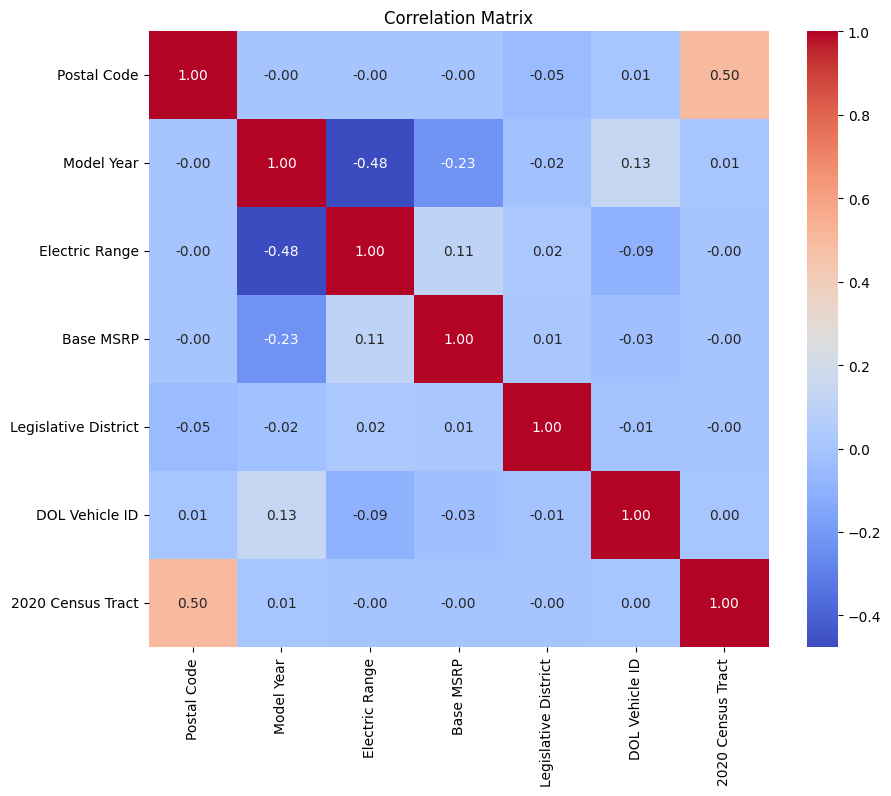

In [ ]:
# Print correlation matrix
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Prepare data for machine learning
X = df.drop(columns=['Electric Vehicle Type'])
y = df['Electric Vehicle Type']
X_encoded = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9984539270253556


## Conclusion:
The Random Forest Classifier model trained on the dataset achieved an impressive accuracy of nearly 99.85% in predicting electric vehicle types based on various features. This high accuracy suggests that the model effectively learned the patterns and relationships within the dataset. It indicates that features such as county, city, model year, make, electric range, base MSRP, legislative district, DOL vehicle ID, vehicle location, electric utility, and census tract are highly predictive of the electric vehicle type.

However, it's essential to acknowledge that the dataset contains a minimal number of missing values, primarily in the county, city, postal code, legislative district, vehicle location, electric utility, and census tract columns. These missing values may have been handled appropriately during preprocessing or may not significantly impact the model's performance due to their small proportion.

Overall, the high accuracy achieved by the model demonstrates its potential for accurately classifying electric vehicle types, which could be valuable in various applications, including vehicle inventory management, urban planning, and environmental research. Nonetheless, further evaluation and validation of the model's performance on diverse datasets and real-world scenarios would be beneficial to ensure its reliability and generalizability. Additionally, continuous monitoring and updates may be necessary to adapt the model to evolving trends and patterns in electric vehicle technology and adoption.